In [1]:
#Treinando uma rede para classifiação multiclass single-label
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# as labels variam de 0 a 45 [são 46 tópicos possíveis!]
train_labels[10]

3

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)        

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
# Compilando a rede
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Separando os dados de validacao
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
# Treinando a rede
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.5119 - accuracy: 0.5328 - val_loss: 1.6995 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.4073 - accuracy: 0.7101 - val_loss: 1.3064 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.0542 - accuracy: 0.7805 - val_loss: 1.1538 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 28ms/step - loss: 0.8293 - accuracy: 0.8295 - val_loss: 1.0441 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.6614 - accuracy: 0.8632 - val_loss: 0.9708 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5210 - accuracy: 0.8929 - val_loss: 0.9500 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.4177 - accuracy: 0.9163 - val_loss: 0.9174 - val_accuracy: 0.8070
Epoch 8/20
16

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

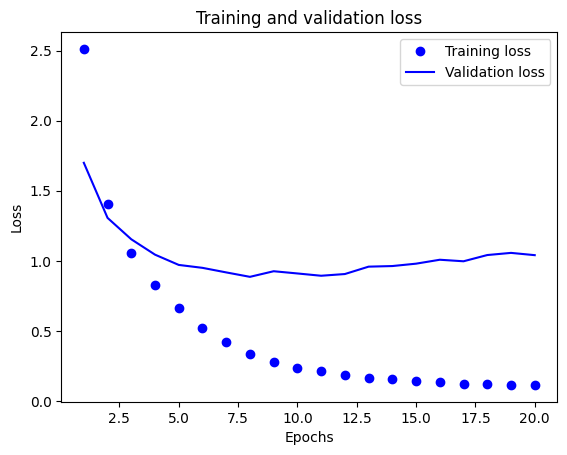

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

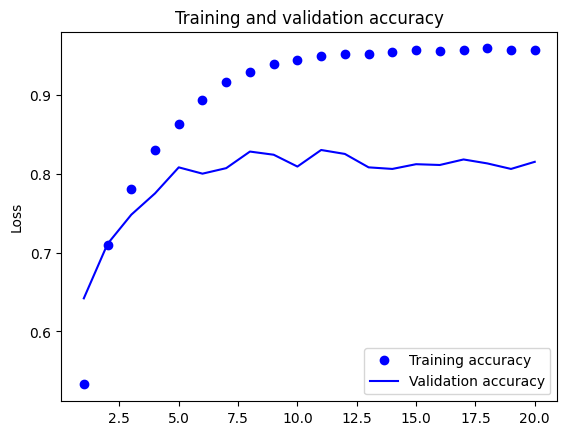

In [24]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel = ('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# Overfit parece começar por volta da nona época
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 37ms/step - loss: 2.6248 - accuracy: 0.5220 - val_loss: 1.7538 - val_accuracy: 0.6190
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 1.4310 - accuracy: 0.7010 - val_loss: 1.3041 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 26ms/step - loss: 1.0551 - accuracy: 0.7779 - val_loss: 1.1231 - val_accuracy: 0.7700
Epoch 4/9
16/16 [==============================] - 0s 26ms/step - loss: 0.8336 - accuracy: 0.8244 - val_loss: 1.0400 - val_accuracy: 0.7950
Epoch 5/9
16/16 [==============================] - 0s 26ms/step - loss: 0.6626 - accuracy: 0.8623 - val_loss: 0.9748 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 26ms/step - loss: 0.5309 - accuracy: 0.8876 - val_loss: 0.9942 - val_accuracy: 0.7770
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.4329 - accuracy: 0.9097 - val_loss: 0.9076 - val_accuracy: 0.8200
Epoch 8/9
16/16 [===

In [26]:
results

[0.995585024356842, 0.7934104800224304]

In [27]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [28]:
predictions[0].shape

(46,)

In [35]:
# A soma de todas as probailidades somam um
np.sum(predictions[1])

0.99999994

In [36]:
# Classe com maior probabilidade nessa entrada
np.argmax(predictions[0])

3